<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


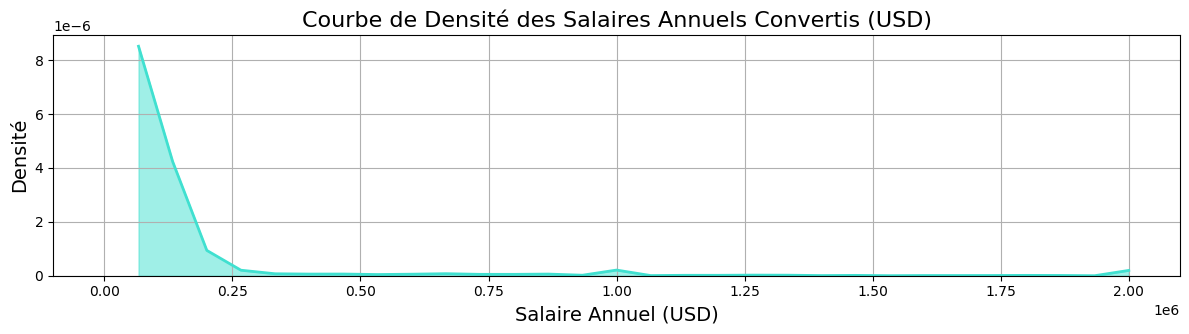

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("m2_survey_data.csv")

# Suppression des valeurs manquantes
converted_comp_cleaned = df['ConvertedComp'].dropna()

# Configurer la taille de la figure pour l'histogramme
plt.figure(figsize=(12, 6))


# Courbe de Densité avec Matplotlib
plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, 2ème graphique
# Calculer la densité
count, bins, ignored = plt.hist(converted_comp_cleaned, bins=30, density=True, alpha=0, color='pink', edgecolor='black')  # Histogramme en arrière-plan
density = (count / sum(count)) / np.diff(bins)  # Calcul de la densité
# Tracer la courbe de densité
plt.plot(bins[1:], density, color='turquoise', linewidth=2, label='Courbe de Densité')
plt.fill_between(bins[1:], density, color='turquoise', alpha=0.5)  # Remplir la zone sous la courbe
plt.title('Courbe de Densité des Salaires Annuels Convertis (USD)', fontsize=16)
plt.xlabel('Salaire Annuel (USD)', fontsize=14)
plt.ylabel('Densité', fontsize=14)
plt.grid()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


Plot the histogram for the column `ConvertedComp`.


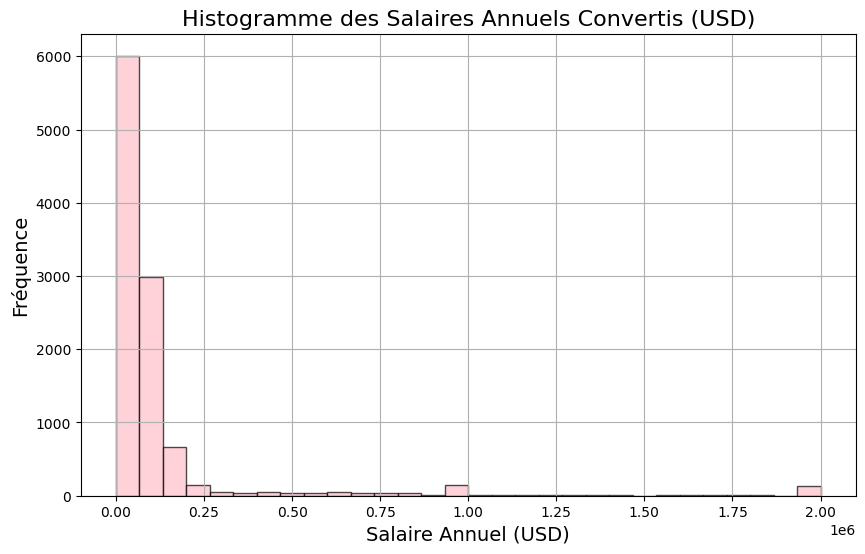

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("m2_survey_data.csv")

# Supprimer les valeurs manquantes dans 'ConvertedComp'
converted_comp_cleaned = df['ConvertedComp'].dropna()

# Configurer la taille de la figure
plt.figure(figsize=(10, 6))

# Tracer l'histogramme
plt.hist(converted_comp_cleaned, bins=30, color='pink', edgecolor='black', alpha=0.7)

# Ajouter des titres et des labels
plt.title('Histogramme des Salaires Annuels Convertis (USD)', fontsize=16)
plt.xlabel('Salaire Annuel (USD)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher la grille
plt.grid()

# Afficher le graphique
plt.show()



What is the median of the column `ConvertedComp`?


In [3]:
import pandas as pd
import requests

# URL du fichier CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"
local_filename = "m2_survey_data.csv"

# Fonction pour télécharger le fichier avec requests
def fetch_data(url, local_filename):
    try:
        # Télécharger le fichier
        response = requests.get(url)
        # Enregistrer le fichier localement
        with open(local_filename, 'wb') as file:
            file.write(response.content)
        print(f"Fichier téléchargé et sauvegardé sous {local_filename}.")
    except Exception as e:
        print(f"Erreur lors du téléchargement du fichier : {e}")

# Télécharger le dataset si nécessaire
fetch_data(url, local_filename)

# Charger le dataset avec pandas
try:
    df = pd.read_csv(local_filename)
    print("Dataset chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du dataset : {e}")

# Afficher les premières lignes du dataframe pour vérifier le contenu
print(df.head())

# Calculer la médiane de la colonne 'ConvertedComp'
if 'ConvertedComp' in df.columns:
    median_converted_comp = df['ConvertedComp'].median()
    print(f"La médiane de la colonne 'ConvertedComp' est : {median_converted_comp}")
else:
    print("La colonne 'ConvertedComp' n'existe pas dans le dataset.")


Fichier téléchargé et sauvegardé sous m2_survey_data.csv.
Dataset chargé avec succès.
   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   


How many responders identified themselves only as a **Man**?


In [4]:
# Compter combien de répondants se sont identifiés uniquement comme "Man"
if 'Gender' in df.columns:
    man_count = df['Gender'].value_counts().get('Man', 0)
    print(f"Nombre de répondants qui se sont identifiés uniquement comme 'Man' : {man_count}")
else:
    print("La colonne 'Gender' n'existe pas dans le dataset.")


Nombre de répondants qui se sont identifiés uniquement comme 'Man' : 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [5]:
# Vérifier si les colonnes 'Gender' et 'ConvertedComp' existent
if 'Gender' in df.columns and 'ConvertedComp' in df.columns:
    # Filtrer les répondants qui se sont identifiés comme "Woman"
    woman_responders = df[df['Gender'] == 'Woman']
    
    # Calculer la médiane de la colonne 'ConvertedComp' pour les femmes
    median_converted_comp_woman = woman_responders['ConvertedComp'].median()
    
    print(f"Médiane de 'ConvertedComp' pour les répondantes qui se sont identifiées uniquement comme 'Woman' : {median_converted_comp_woman}")
else:
    print("Les colonnes 'Gender' ou 'ConvertedComp' n'existent pas dans le dataset.")


Médiane de 'ConvertedComp' pour les répondantes qui se sont identifiées uniquement comme 'Woman' : 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [6]:
# Vérifier si la colonne 'Age' existe dans le DataFrame
if 'Age' in df.columns:
    # Calculer les statistiques
    min_age = df['Age'].min()        # Minimum
    q1_age = df['Age'].quantile(0.25) # Premier quartile (Q1)
    median_age = df['Age'].median()  # Médiane (Q2)
    q3_age = df['Age'].quantile(0.75) # Troisième quartile (Q3)
    max_age = df['Age'].max()        # Maximum

    # Afficher la synthèse des cinq nombres
    print(f"Five-number summary for 'Age':")
    print(f"Minimum: {min_age}")
    print(f"Q1 (First Quartile): {q1_age}")
    print(f"Median: {median_age}")
    print(f"Q3 (Third Quartile): {q3_age}")
    print(f"Maximum: {max_age}")
else:
    print("La colonne 'Age' n'existe pas dans le dataset.")



Five-number summary for 'Age':
Minimum: 16.0
Q1 (First Quartile): 25.0
Median: 29.0
Q3 (Third Quartile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


<ipython-input-1-c49bd3ac0673>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The qua

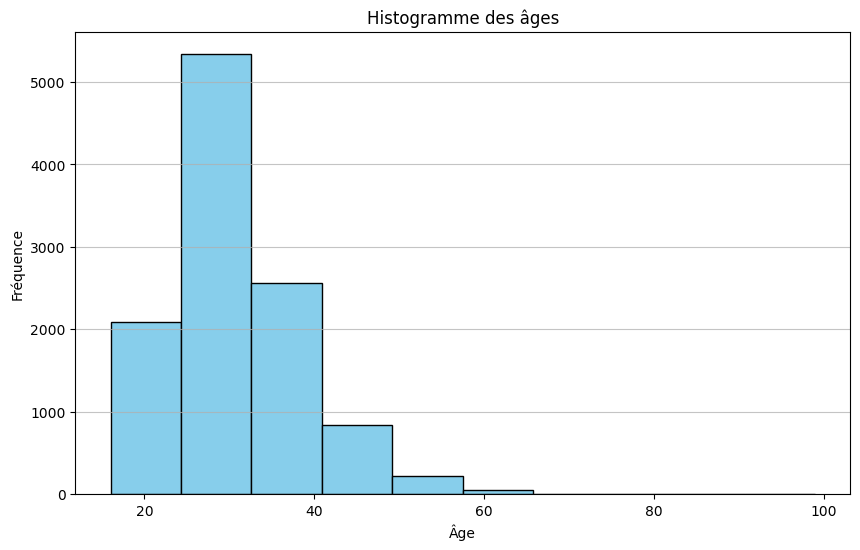

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL du fichier CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Télécharger le fichier CSV
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Sauvegarder le contenu du CSV dans un fichier local
    local_filename = "m2_survey_data.csv"
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    
    # Lire le fichier CSV dans un DataFrame
    df = pd.read_csv(local_filename)
    
    # Afficher les premières lignes du DataFrame pour vérifier les données
    print(df.head())
    
    # Tracer l'histogramme de la colonne 'Age'
    plt.figure(figsize=(10, 6))
    plt.hist(df['Age'].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogramme des âges')
    plt.xlabel('Âge')
    plt.ylabel('Fréquence')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print(f"Erreur lors du téléchargement du fichier : {response.status_code}")



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The qua

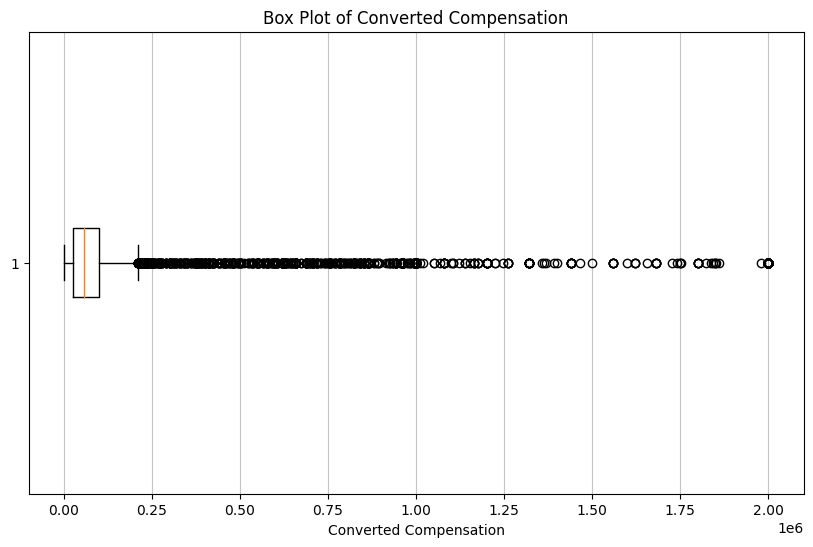

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Download the CSV file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the CSV to a local file
    local_filename = "m2_survey_data.csv"
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(local_filename)
    
    # Display the first few rows to understand the data
    print(df.head())
    
    # Create a box plot for the 'ConvertedComp' column
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
    plt.title('Box Plot of Converted Compensation')
    plt.xlabel('Converted Compensation')
    plt.grid(axis='x', alpha=0.75)
    plt.show()
    
else:
    print(f"Error downloading the file: {response.status_code}")



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [3]:
import requests
import pandas as pd

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Download the CSV file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the CSV to a local file
    local_filename = "m2_survey_data.csv"
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(local_filename)
    
    # Calculate the first and third quartiles
    Q1 = df['ConvertedComp'].quantile(0.25)
    Q3 = df['ConvertedComp'].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"Interquartile Range (IQR): {IQR}")
    
else:
    print(f"Error downloading the file: {response.status_code}")



Q1: 26868.0
Q3: 100000.0
Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [4]:
import requests
import pandas as pd

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Download the CSV file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the CSV to a local file
    local_filename = "m2_survey_data.csv"
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(local_filename)
    
    # Calculate the first and third quartiles
    Q1 = df['ConvertedComp'].quantile(0.25)
    Q3 = df['ConvertedComp'].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"Interquartile Range (IQR): {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

else:
    print(f"Error downloading the file: {response.status_code}")



Q1: 26868.0
Q3: 100000.0
Interquartile Range (IQR): 73132.0
Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [5]:
import requests
import pandas as pd

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Download the CSV file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the CSV to a local file
    local_filename = "m2_survey_data.csv"
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(local_filename)
    
    # Calculate the first and third quartiles
    Q1 = df['ConvertedComp'].quantile(0.25)
    Q3 = df['ConvertedComp'].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
    
    # Count the number of outliers
    num_outliers = outliers.shape[0]
    
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"Interquartile Range (IQR): {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {num_outliers}")

else:
    print(f"Error downloading the file: {response.status_code}")


Q1: 26868.0
Q3: 100000.0
Interquartile Range (IQR): 73132.0
Lower Bound: -82830.0
Upper Bound: 209698.0
Number of Outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [6]:
import requests
import pandas as pd

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Download the CSV file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the CSV to a local file
    local_filename = "m2_survey_data.csv"
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(local_filename)
    
    # Calculate the first and third quartiles
    Q1 = df['ConvertedComp'].quantile(0.25)
    Q3 = df['ConvertedComp'].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a new DataFrame without the outliers
    df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
    
    # Display the new DataFrame
    print("Original DataFrame shape:", df.shape)
    print("New DataFrame shape (without outliers):", df_no_outliers.shape)
    
else:
    print(f"Error downloading the file: {response.status_code}")


Original DataFrame shape: (11398, 85)
New DataFrame shape (without outliers): (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [10]:
import requests
import pandas as pd

# URL du fichier CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Télécharger le fichier CSV
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Enregistrer le contenu du CSV dans un fichier local
    local_filename = "m2_survey_data.csv"
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    
    # Lire le fichier CSV dans un DataFrame
    df = pd.read_csv(local_filename)
    
    # Afficher les types de données des colonnes
    print("Types de données des colonnes :")
    print(df.dtypes)
    
    # Supprimer les colonnes non numériques (ou convertir si possible)
    df_numeric = df.select_dtypes(include=['number'])
    
    # Calculer la matrice de corrélation
    correlation_matrix = df_numeric.corr()
    
    # Extraire la corrélation de 'Age' avec les autres colonnes numériques
    if 'Age' in correlation_matrix.columns:
        age_correlation = correlation_matrix['Age']
        # Afficher les valeurs de corrélation
        print("Corrélation de l'Age avec les autres colonnes numériques :")
        print(age_correlation)
    else:
        print("La colonne 'Age' n'est pas présente dans les colonnes numériques.")
else:
    print(f"Erreur lors du téléchargement du fichier : {response.status_code}")


Types de données des colonnes :
Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object
Corrélation de l'Age avec les autres colonnes numériques :
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
